# 0.  Introduction: Business Problem

This project will be an exploration and analysis of suburban Philadelphia, Pennsylania, USA. The intended audience for the final report is the management of Burger Chain, Inc. who are looking to expand their locations in PA. In this project we will leverage the Foursquare API, along with interactive maps, clustering analysis and other exploratory techniques, to learn about the neighborhoods and the associated market opportunity. Identifying the right expansion locations for Burger Chain, Inc. could make the difference toward a successful expansion and therefore to the future of the business. 


# 1. Data

As part of this project, we will use the Foursquare API to obtain data on types of restaurants, retail venues and other industry, demographic and other features in the towns and regions around Philadelphia and surrouding area. The coordinates of towns and regions of suburban Philadelphia are publicly available. Certain key features will be explored, such as new upscale housing and commercial real estate developments, and competitive and complementary food and restaurant locations. We will seek to understand where successful branded companies are located, and what the demographic trends are in different neighborhoods. Nearby golf courses, parks, trails and other green spaces, good schools, colleges and universities and economic and population growth may be factors to consider.

Additional datasets may also be used such as the Crime Dataset from Kaggle (see https://www.kaggle.com), and one or more data sets from Open Data Philly, the official repository for the City of Philadelphia(https://www.opendataphilly.org). Dataset addressing one or more of the following topics may also be explored:

* Population density, regional wealth indices
* Parks, Playgrounds, Picnic sites 
* Tobacco retailer permits, Air quality index
* Choice neighborhoods, Neighborhood food retail and neighborhood resources
* Land use, Vacant property indicators 
* Crime incidents, Shooting victims, Fatal crashes

The objective will be to explore and analyze the various data in new ways in order to develop an insightful picture of the Philadelphia region broady and potential specific areas where branches could be located.


# 2. Methodology

In this project, we started by exploring several key features of 98 suburban towns in the Philadelphia and surrounding area: median house price, crime rate, and population growth. These features were sorted and visualized through plots (using the Seaborn package) and through interactive maps (using the Folium package).

Latitude and Longitude coordinates were obtained using the Geopy package by using the zip codes of each town. Once the coordinates were checked, data concerning local businesses were then retrieved using the Foursquare API for each suburban town.  A 1.0 km radius was used as the search radius. The retrieved records were counted to get a sense for the density of establishments at each location, and top ten records were inspected for each town. 

Using the information about venues and local businesses, a clustering analysis of the town was performed to explore similarity of the towns according to the Foursquare data. A range of k-values from 3:10 were tried and ultimately a value of k=9 was used based on an inspection of the results.

Finally, the seven clusters were examined to see what types of features stood out as salient types of businesses for each location. These features could be mapped and used as a starting opint for a 'street level' exploration of possible expansion locations for the client, Burger Chain Inc.



# 3. Analysis

We first install the needed libraries.

In [1]:
!pip install bs4
import pandas as pd
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import requests
from bs4 import BeautifulSoup
!pip install folium
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Folium installed')
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from sklearn.cluster import KMeans  # import k-means from clustering stage
import matplotlib.cm as cm     # Matplotlib and associated plotting modules
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image # libraries for displaying images
from IPython.core.display import HTML 
print('Libraries imported.')

Folium installed
Libraries imported.


We can use the geopy package to get latitude/longitude coordinates. 

In [3]:
#  Use geopy to find lat/long for each town
address = 'Ambler, Pennsylvania'
geolocator = Nominatim(user_agent="pa_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of {} are {}, {}.'.format(address, latitude, longitude))

The geographical coordinates of Ambler, Pennsylvania are 40.1545535, -75.2215651.


We import our dataset:

In [4]:
# Import Phila area towns info from csv
df = pd.read_csv("C:\\Users\\steph\\pythonstuff\\phila_towns_zips.csv")
df

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhiladelphia,PopChg,Name,County,ZipCode
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgomery,19001
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgomery,19002
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware,19014
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks,19020
4,79124,7.9124,54.1,19.0,3.9,Bristol Borough,Bucks,19007
...,...,...,...,...,...,...,...,...
94,174232,17.4232,13.8,25.0,4.7,Westtown,Chester,19342
95,196515,19.6515,29.9,16.0,1.8,Whitemarsh,Montgomery,19031
96,232714,23.2714,9.9,21.0,0.2,Willistown,Chester,19073
97,245920,24.5920,22.6,10.0,0.3,Wynnewood,Montgomery,19003


Using the zip codes, we get the coordinates for each Town in the Philadelphia region.

In [5]:
# Get the latitude and longitude for each town

df['Latitude'] = [0]*99
df['Longitude'] = [0]*99
hoodnum = 0

for zcode in df['ZipCode']:
    address = '{}, Pennsylvania'.format(zcode)
    geolocator = Nominatim(user_agent="pa_explorer")
    location = geolocator.geocode(address)
    latitude = location[1][0]
    longitude = location[1][1]

    df.loc[hoodnum, 'Latitude'] = latitude
    df.loc[hoodnum, 'Longitude'] = longitude
    hoodnum = hoodnum + 1

In [6]:
df.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhiladelphia,PopChg,Name,County,ZipCode,Latitude,Longitude
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgomery,19001,40.126918,-75.126680
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgomery,19002,40.174003,-75.212356
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware,19014,39.887240,-75.563472
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks,19020,40.108163,-74.938024
4,79124,7.9124,54.1,19.0,3.9,Bristol Borough,Bucks,19007,40.110056,-74.860923


### Philadelphia region map

In [7]:
# create map of Philadelphia using latitude and longitude values
map_philly = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, town, county in zip(df['Latitude'], df['Longitude'], df['Name'], df['County']):
    label = '{}, {}'.format(town, county)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_philly)  
    
map_philly

###  Numerical summary and exploratory plots

Let's first look at a numerical summary of our data set.

In [8]:
df[["HousePrice","CrimeRate","MilesPhiladelphia","PopChg"]].describe()

,HousePrice,CrimeRate,MilesPhiladelphia,PopChg
count,99.000000,99.000000,99.000000,98.000000
mean,157835.606061,32.576768,19.282828,2.479592
std,86644.159973,37.540908,9.099552,5.632307
min,28000.000000,6.600000,0.000000,-9.200000
25%,98505.000000,17.400000,13.000000,-0.625000
50%,140463.000000,24.100000,20.000000,1.600000
75%,195830.000000,39.800000,24.500000,4.775000
max,475112.000000,366.100000,50.000000,26.900000


We then plot some of the key variables:

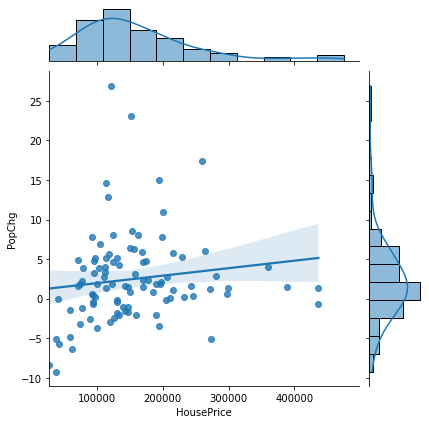

In [13]:
sns.jointplot(x="HousePrice", y="PopChg", data=df, kind='reg');

The scatterplot above shows Population Change percentage versus median House Price, along with histograms of each on the margins.

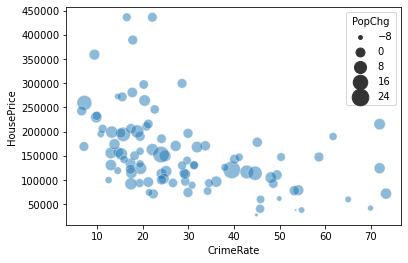

In [12]:
data_bubble = df[df["CrimeRate"] < 150]
sns.scatterplot(data=data_bubble, x="CrimeRate", y="HousePrice", size="PopChg", alpha=0.5, sizes=(5, 300))
plt.show()

The bubble plot above shows median House Price versus Crime Rate with bubble size representing population growth.

##  Using the Foursquare API

Now that we've explored our data set, let's use use Foursquare to obtain detailed information about businesses and venues in each of our Philly region towns.

We start with our required credentials:

In [14]:
CLIENT_ID = '3VH3RBUX11UHLC4BYM2THX4L52OB2U2D2QX1YKGMXQ0ZIPUR' # your Foursquare ID
CLIENT_SECRET = 'GPU4351JMFH2ZRBFW4S04CN3TYB2HLINMZDHX0T11IEWXID1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3VH3RBUX11UHLC4BYM2THX4L52OB2U2D2QX1YKGMXQ0ZIPUR
CLIENT_SECRET:GPU4351JMFH2ZRBFW4S04CN3TYB2HLINMZDHX0T11IEWXID1


We will use the following GET request using the Foursquare API:

https://api.foursquare.com/v2/venues/explore?client_id=CLIENT_ID&client_secret=CLIENT_SECRET&ll=LATITUDE,LONGITUDE&v=VERSION&limit=LIMIT


We first explore a sample neighborhood in Pennsylvania:

In [15]:
df.loc[8, 'Name']

'Bryn Mawr'

In [16]:
town_latitude = df.loc[8, 'Latitude'] # neighborhood latitude value
town_longitude = df.loc[8, 'Longitude'] # neighborhood longitude value

town_name = df.loc[8, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(town_name, 
                                                               town_latitude, 
                                                               town_longitude))

Latitude and longitude values of Bryn Mawr are 40.02343282205611, -75.32982906438943.


Let's get the top venues that are in Bryn Mawr, Pennsylvania neighborhood within a radius of 1,000 meters.


In [17]:
# First, let's create the GET request URL. Name your URL url.
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    town_latitude, 
    town_longitude, 
    radius, 
    LIMIT)

In [18]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60ca979b664ecb5960c0c13b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Radnor',
  'headerFullLocation': 'Radnor',
  'headerLocationGranularity': 'city',
  'totalResults': 26,
  'suggestedBounds': {'ne': {'lat': 40.02793282655611,
    'lng': -75.32396368043266},
   'sw': {'lat': 40.018932817556106, 'lng': -75.3356944483462}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c12ccec7f7f2d7fe801de68',
       'name': "Hope's Cookies",
       'location': {'address': '1125 W Lancaster Ave',
        'lat': 40.02495473264503,
        'lng': -75.32507014761774,
        'labeledLatLngs': [{'label': 'display',
 

With the Foursquare API, all the information is in the items key. We will use the get_category_type function that was  defined in a previous lab.

In [19]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Let's clean the json and structure it into a pandas dataframe. 

We can see some of the top venues in Bryn Mawr, PA below.

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

<ipython-input-20-53c7dde730be>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Hope's Cookies,Bakery,40.024955,-75.325070
1,Insomnia Cookies,Dessert Shop,40.026518,-75.328676
2,The New Leaf Club,Café,40.026545,-75.326362
3,MOM's Organic Market,Organic Grocery,40.025695,-75.325492
4,Le Beaute Nails,Nail Salon,40.025825,-75.325815
5,Domino's Pizza,Pizza Place,40.025818,-75.326630
6,Qdoba Mexican Grill,Mexican Restaurant,40.024660,-75.325290
7,Samurai Japanese Restaurant,Japanese Restaurant,40.025560,-75.326219
8,CVS pharmacy,Pharmacy,40.025568,-75.327001
9,APlus At Sunoco,Gas Station,40.026047,-75.328051


In [21]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

26 venues were returned by Foursquare.


## Obtaining information about venues in 98 towns

We now create a function to repeat the same process on 98 towns surrounding the Philadelphia region.


In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Name', 
                  'Town Latitude', 
                  'Town Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called suburb_venues.


In [23]:
suburb_venues = getNearbyVenues(names=df['Name'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Abington
Ambler
Aston
Bensalem
Bristol Borough
Bristol Township
Brookhaven
Bryn Athyn
Bryn Mawr
Buckingham
Chalfont
Cheltenham
Clifton
Collegeville
Darby Borough
Darby Township
Downingtown
Doylestown
East Bradford
East Goshen
East Norriton
East Pikeland
East Whiteland
Easttown
Falls Town
Follcroft
Gladwyne
Glenolden
Hatboro
Haverford
Horsham
Jenkintown
Lower Southampton
Lower Gwynedd
Lower Makefield
Lower Merion
Lower Moreland
Lansdale
Lansdown
Limerick
Malvern
Marple
Media
Middletown
Morrisville
Morton
North Wales
Narberth
Nether
Newtown
Newtown Borough
Newtown Township
Norristown
Northampton
Norwood
Philadelphia, Far NE
Philadelphia, N
Philadelphia, NE
Philadelphia, NW
Philadelphia, SW
Philadelphia, South
Philadelphia, West
Philadelphia, CC
Phoenixville
Plymouth
Pottstown
Prospect Park
Radnor
Ridley Park
Ridley Town
Royersford
Schuylkill
Sharon Hill
Solebury
Springfield
Springfield
Swarthmore
Tredyffin
Upper Chichester
Upper Makefield
Upper Merion
Upper Moreland
Upper Providence
Uppe

Let's check how many venues were returned for each neighborhood.

In [24]:
suburb_venues.groupby('Name').count()

,Town Latitude,Town Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Name,,,,,,
Abington,10,10,10,10,10,10
Ambler,4,4,4,4,4,4
Aston,1,1,1,1,1,1
Bensalem,16,16,16,16,16,16
Bristol Borough,5,5,5,5,5,5
...,...,...,...,...,...,...
Westtown,1,1,1,1,1,1
Whitemarsh,4,4,4,4,4,4
Willistown,8,8,8,8,8,8


Let's find out how many unique categories can be curated from all the returned venues


In [25]:
print('There are {} uniques categories.'.format(len(suburb_venues['Venue Category'].unique())))

There are 167 uniques categories.


##  Exploring the frequency of venues in each town

We first one-hot encode for the existence of various location types within each town.

In [26]:
# one hot encoding
suburb_onehot = pd.get_dummies(suburb_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
suburb_onehot['Name'] = suburb_venues['Name'] 

# move neighborhood column to the first column
fixed_columns = [suburb_onehot.columns[-1]] + list(suburb_onehot.columns[:-1])
suburb_onehot = suburb_onehot[fixed_columns]

suburb_onehot.head()

,Name,Airport Service,American Restaurant,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wings Joint,Women's Store,Yoga Studio
0,Abington,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abington,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abington,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abington,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abington,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
suburb_onehot.shape  

(865, 168)

In [28]:
suburb_grouped = suburb_onehot.groupby('Name').mean().reset_index()
# suburb_grouped takes a while to render

In [29]:
num_top_venues = 6

for hood in suburb_grouped['Name']:
    print("----"+hood+"----")
    temp = suburb_grouped[suburb_grouped['Name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abington----
                 venue  freq
0          Pizza Place   0.1
1             Pharmacy   0.1
2  Fried Chicken Joint   0.1
3              Brewery   0.1
4       Sandwich Place   0.1
5    Convenience Store   0.1


----Ambler----
                        venue  freq
0           Other Repair Shop  0.25
1                Home Service  0.25
2  Construction & Landscaping  0.25
3                    Building  0.25
4             Airport Service  0.00
5                 Music Venue  0.00


----Aston----
                           venue  freq
0     Construction & Landscaping   1.0
1                Airport Service   0.0
2  Paper / Office Supplies Store   0.0
3                    Music Venue   0.0
4                     Nail Salon   0.0
5        New American Restaurant   0.0


----Bensalem----
               venue  freq
0               Bank  0.12
1        Pizza Place  0.12
2     Sandwich Place  0.12
3                Pub  0.06
4  Indian Restaurant  0.06
5     Ice Cream Shop  0.06


----Bristol 

5                    Pizza Place  0.06


----Marple----
             venue  freq
0      Beer Garden  0.33
1             Park  0.33
2    Moving Target  0.33
3  Airport Service  0.00
4  Organic Grocery  0.00
5      Music Venue  0.00


----Media----
               venue  freq
0            Brewery   0.2
1     Nightlife Spot   0.2
2       Home Service   0.2
3        Coffee Shop   0.2
4      Moving Target   0.2
5  Other Repair Shop   0.0


----Middletown----
                 venue  freq
0      Doctor's Office  0.17
1          Beer Garden  0.17
2                  Pub  0.17
3  American Restaurant  0.17
4         Home Service  0.17
5   Chinese Restaurant  0.17


----Morrisville----
                           venue  freq
0                 Discount Store   0.5
1                     Restaurant   0.5
2  Paper / Office Supplies Store   0.0
3                    Music Venue   0.0
4                     Nail Salon   0.0
5        New American Restaurant   0.0


----Morton----
                venue  freq


                 venue  freq
0  Fried Chicken Joint   0.2
1            Racetrack   0.2
2          Dry Cleaner   0.2
3    Electronics Store   0.2
4         Gourmet Shop   0.2
5    Other Repair Shop   0.0


----Upper Merion----
                venue  freq
0         Pizza Place  0.17
1           Gastropub  0.08
2                 Gym  0.08
3       Deli / Bodega  0.08
4   Convenience Store  0.08
5  Chinese Restaurant  0.08


----Upper Moreland----
                           venue  freq
0                        Dog Run   1.0
1                Airport Service   0.0
2  Paper / Office Supplies Store   0.0
3                    Music Venue   0.0
4                     Nail Salon   0.0
5        New American Restaurant   0.0


----Upper Providence----
               venue  freq
0            Brewery   0.2
1     Nightlife Spot   0.2
2       Home Service   0.2
3        Coffee Shop   0.2
4      Moving Target   0.2
5  Other Repair Shop   0.0


----Upper Southampton----
                     venue  freq
0  

Above, we can see the most popular types of venues/businesses in each town.

The following function sorts the venues in descending order.


In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
town_venues_sorted = pd.DataFrame(columns=columns)
town_venues_sorted['Name'] = suburb_grouped['Name']

for ind in np.arange(suburb_grouped.shape[0]):
    town_venues_sorted.iloc[ind, 1:] = return_most_common_venues(suburb_grouped.iloc[ind, :], num_top_venues)

town_venues_sorted.head()

,Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abington,Pizza Place,Fried Chicken Joint,Pharmacy,Convenience Store,Sandwich Place,Smoke Shop,Brewery,Deli / Bodega,Insurance Office,Home Service
1,Ambler,Other Repair Shop,Home Service,Construction & Landscaping,Building,Dive Bar,Doctor's Office,Food,Flower Shop,Fish Market,Fish & Chips Shop
2,Aston,Construction & Landscaping,Yoga Studio,Event Service,Food,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm
3,Bensalem,Pizza Place,Sandwich Place,Bank,Pharmacy,Music Venue,Pub,Convenience Store,Bagel Shop,Playground,Japanese Restaurant
4,Bristol Borough,Liquor Store,Discount Store,Italian Restaurant,Gas Station,Park,Eye Doctor,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant


## Clustering analysis of towns

We will use k-means clustering to cluster the 98 towns into 9 clusters.


In [32]:
# set number of clusters
kclusters = 9

suburb_grouped_clustering = suburb_grouped.drop('Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(suburb_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 0, 0, 4, 4, 4, 4, 1, 4, 4])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [33]:
# add clustering labels
town_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

philly_suburbs_merged = df

# merge philly_suburbs_grouped with df to add lat/long for each neighborhood
philly_suburbs_merged = philly_suburbs_merged.join(town_venues_sorted.set_index('Name'), on='Name')

# remove NAs and cast to type int
philly_suburbs_merged['Cluster Labels']=philly_suburbs_merged['Cluster Labels'].fillna(0).astype('int') 

philly_suburbs_merged.head() # check the last columns!

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhiladelphia,PopChg,Name,County,ZipCode,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgomery,19001,40.126918,-75.126680,...,Pizza Place,Fried Chicken Joint,Pharmacy,Convenience Store,Sandwich Place,Smoke Shop,Brewery,Deli / Bodega,Insurance Office,Home Service
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgomery,19002,40.174003,-75.212356,...,Other Repair Shop,Home Service,Construction & Landscaping,Building,Dive Bar,Doctor's Office,Food,Flower Shop,Fish Market,Fish & Chips Shop
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware,19014,39.887240,-75.563472,...,Construction & Landscaping,Yoga Studio,Event Service,Food,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks,19020,40.108163,-74.938024,...,Pizza Place,Sandwich Place,Bank,Pharmacy,Music Venue,Pub,Convenience Store,Bagel Shop,Playground,Japanese Restaurant
4,79124,7.9124,54.1,19.0,3.9,Bristol Borough,Bucks,19007,40.110056,-74.860923,...,Liquor Store,Discount Store,Italian Restaurant,Gas Station,Park,Eye Doctor,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant


### Map showing the 9 clusters

Finally, let's visualize the clusters on a map:


In [34]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(philly_suburbs_merged['Latitude'], philly_suburbs_merged['Longitude'], philly_suburbs_merged['Name'], philly_suburbs_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examining the Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster.

Cluster 0:

In [35]:
philly_suburbs_merged.loc[philly_suburbs_merged['Cluster Labels'] == 0, philly_suburbs_merged.columns[[1] + list(range(5, philly_suburbs_merged.shape[1]))]]

,"HsPrc ($10,000)",Name,County,ZipCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,11.3033,Ambler,Montgomery,19002,40.174003,-75.212356,0,Other Repair Shop,Home Service,Construction & Landscaping,Building,Dive Bar,Doctor's Office,Food,Flower Shop,Fish Market,Fish & Chips Shop
2,12.4186,Aston,Delaware,19014,39.887240,-75.563472,0,Construction & Landscaping,Yoga Studio,Event Service,Food,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm
33,27.2790,Lower Gwynedd,Montgomery,19002,40.174003,-75.212356,0,Other Repair Shop,Home Service,Construction & Landscaping,Building,Dive Bar,Doctor's Office,Food,Flower Shop,Fish Market,Fish & Chips Shop
53,16.9401,Northampton,Bucks,18067,40.718326,-75.485183,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,6.0000,"Philadelphia, Far NE",Philadelphiadelphia,19154,40.090143,-74.978268,0,Breakfast Spot,Construction & Landscaping,Eye Doctor,Food Truck,Food,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


Cluster 1:

In [36]:
philly_suburbs_merged.loc[philly_suburbs_merged['Cluster Labels'] == 1, philly_suburbs_merged.columns[[1] + list(range(5, philly_suburbs_merged.shape[1]))]]

,"HsPrc ($10,000)",Name,County,ZipCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,19.5145,Bryn Athyn,Montgomery,19006,40.126542,-75.065739,1,Mediterranean Restaurant,Restaurant,Kitchen Supply Store,Gift Shop,Bakery,Yoga Studio,Eye Doctor,Flower Shop,Fish Market,Fish & Chips Shop
32,13.0436,Lower Southampton,Delaware,19006,40.126542,-75.065739,1,Mediterranean Restaurant,Restaurant,Kitchen Supply Store,Gift Shop,Bakery,Yoga Studio,Eye Doctor,Flower Shop,Fish Market,Fish & Chips Shop
36,21.0884,Lower Moreland,Montgomery,19006,40.126542,-75.065739,1,Mediterranean Restaurant,Restaurant,Kitchen Supply Store,Gift Shop,Bakery,Yoga Studio,Eye Doctor,Flower Shop,Fish Market,Fish & Chips Shop
44,9.6769,Morrisville,Bucks,19067,40.217744,-74.828716,1,Discount Store,Restaurant,Yoga Studio,Eye Doctor,Food,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
98,13.0953,Yardley,Bucks,19067,40.217744,-74.828716,1,Discount Store,Restaurant,Yoga Studio,Eye Doctor,Food,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


Cluster 2:

In [37]:
philly_suburbs_merged.loc[philly_suburbs_merged['Cluster Labels'] == 2, philly_suburbs_merged.columns[[1] + list(range(5, philly_suburbs_merged.shape[1]))]]

,"HsPrc ($10,000)",Name,County,ZipCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,38.9302,Horsham,Montgomery,19044,40.182987,-75.149125,2,Dog Run,Yoga Studio,Eye Doctor,Food,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm
81,13.3198,Upper Moreland,Montgomery,19044,40.182987,-75.149125,2,Dog Run,Yoga Studio,Eye Doctor,Food,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm


Cluster 3:

In [38]:
philly_suburbs_merged.loc[philly_suburbs_merged['Cluster Labels'] == 3, philly_suburbs_merged.columns[[1] + list(range(5, philly_suburbs_merged.shape[1]))]]

,"HsPrc ($10,000)",Name,County,ZipCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,17.0556,East Whiteland,Chester,19341,40.042661,-75.633177,3,Seafood Restaurant,Ski Shop,Big Box Store,Coffee Shop,Eye Doctor,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
87,16.3001,Uwchlan Township,Chester,19341,40.042661,-75.633177,3,Seafood Restaurant,Ski Shop,Big Box Store,Coffee Shop,Eye Doctor,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
93,15.2624,Warrington,Bucks,18976,40.240151,-75.135260,3,Italian Restaurant,Seafood Restaurant,Yoga Studio,Event Service,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm


Cluster 4:

In [39]:
philly_suburbs_merged.loc[philly_suburbs_merged['Cluster Labels'] == 4, philly_suburbs_merged.columns[[1] + list(range(5, philly_suburbs_merged.shape[1]))]]

,"HsPrc ($10,000)",Name,County,ZipCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,14.0463,Abington,Montgomery,19001,40.126918,-75.126680,4,Pizza Place,Fried Chicken Joint,Pharmacy,Convenience Store,Sandwich Place,Smoke Shop,Brewery,Deli / Bodega,Insurance Office,Home Service
3,11.0490,Bensalem,Bucks,19020,40.108163,-74.938024,4,Pizza Place,Sandwich Place,Bank,Pharmacy,Music Venue,Pub,Convenience Store,Bagel Shop,Playground,Japanese Restaurant
4,7.9124,Bristol Borough,Bucks,19007,40.110056,-74.860923,4,Liquor Store,Discount Store,Italian Restaurant,Gas Station,Park,Eye Doctor,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant
5,9.2634,Bristol Township,Bucks,19007,40.110056,-74.860923,4,Liquor Store,Discount Store,Italian Restaurant,Gas Station,Park,Eye Doctor,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant
6,8.9246,Brookhaven,Delaware,19015,39.865984,-75.387238,4,Deli / Bodega,Other Repair Shop,Business Service,Furniture / Home Store,Sandwich Place,Grocery Store,Dog Run,Donut Shop,Dry Cleaner,Doctor's Office
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,11.4157,West Whiteland,Chester,19353,51.515415,-3.155765,4,Bar,Bus Stop,Shopping Mall,Betting Shop,Fish & Chips Shop,Yoga Studio,Food,Flower Shop,Fish Market,Fast Food Restaurant
92,13.0088,Warminster,Bucks,18974,40.203901,-75.080557,4,Italian Restaurant,Asian Restaurant,Non-Profit,Sandwich Place,Yoga Studio,Eye Doctor,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant
95,19.6515,Whitemarsh,Montgomery,19031,40.107642,-75.205719,4,Pool,Campground,Golf Course,Baseball Field,Yoga Studio,Farm,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant
96,23.2714,Willistown,Chester,19073,39.985459,-75.418880,4,Coffee Shop,Pharmacy,Mini Golf,Gym,Pizza Place,Flower Shop,American Restaurant,Dive Bar,Fish Market,Fish & Chips Shop


Cluster 5:

In [40]:
philly_suburbs_merged.loc[philly_suburbs_merged['Cluster Labels'] == 5, philly_suburbs_merged.columns[[1] + list(range(5, philly_suburbs_merged.shape[1]))]]

,"HsPrc ($10,000)",Name,County,ZipCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
39,12.1024,Limerick,Montgomery,19464,40.252177,-75.626525,5,Golf Course,Yoga Studio,Eye Doctor,Food,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm
65,7.8175,Pottstown,Montgomery,19464,40.252177,-75.626525,5,Golf Course,Yoga Studio,Eye Doctor,Food,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm
70,9.5831,Royersford,Montgomery,19468,40.207140,-75.530302,5,Construction & Landscaping,Golf Course,Yoga Studio,Event Service,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm


Cluster 6:

In [41]:
philly_suburbs_merged.loc[philly_suburbs_merged['Cluster Labels'] == 6, philly_suburbs_merged.columns[[1] + list(range(5, philly_suburbs_merged.shape[1]))]]

,"HsPrc ($10,000)",Name,County,ZipCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
48,15.0283,Nether,Delaware,19037,39.922147,-75.443294,6,Event Service,Church,Yoga Studio,Food,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm
83,14.2811,Upper Southampton,Bucks,18966,40.188868,-75.005005,6,Event Service,IT Services,Yoga Studio,Food,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm


Cluster 7:

In [42]:
philly_suburbs_merged.loc[philly_suburbs_merged['Cluster Labels'] == 7, philly_suburbs_merged.columns[[1] + list(range(5, philly_suburbs_merged.shape[1]))]]

,"HsPrc ($10,000)",Name,County,ZipCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
94,17.4232,Westtown,Chester,19342,39.885915,-75.505613,7,Park,Yoga Studio,Event Service,Food,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm


Cluster 8:

In [43]:
philly_suburbs_merged.loc[philly_suburbs_merged['Cluster Labels'] == 8, philly_suburbs_merged.columns[[1] + list(range(5, philly_suburbs_merged.shape[1]))]]

,"HsPrc ($10,000)",Name,County,ZipCode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
41,18.5404,Marple,Delaware,19008,39.974778,-75.360338,8,Moving Target,Park,Beer Garden,Yoga Studio,Eye Doctor,Flower Shop,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
42,12.6160,Media,Delaware,19063,39.916052,-75.401804,8,Moving Target,Home Service,Nightlife Spot,Coffee Shop,Brewery,Yoga Studio,Farm,Flower Shop,Fish Market,Fish & Chips Shop
82,24.2821,Upper Providence,Delaware,19063,39.916052,-75.401804,8,Moving Target,Home Service,Nightlife Spot,Coffee Shop,Brewery,Yoga Studio,Farm,Flower Shop,Fish Market,Fish & Chips Shop




# 4. Results and Discussion

The clusters arising from the analysis were in certain cases informative, and in other cases, uninformative. In most cases the clusters were based on obvious similarity of type and number of establishments. However, there were cases where very different towns (based on says crime rate or median house price) were grouped together when the comparability of those towns appeared to be limited. 

In cases were a single town was returned as belonging to a 'cluster' or where two very disparate towns belonged to a cluster based on a superficial similarity, these cases were inspected and deemed relevant or irrelevant on a case-by-case basis. In other cases, clusterings were useful (such as Cluster 5) in terms of highlighting towns that could be ruled out groups of towns characterized by a lack of critical mass of establishments, implying low foot traffic and below median commercial opportunity.

Clusters 3, 4 and 8 may be the most interesting and potentially useful. They appear to show towns with higher than average disposal income levels and a large of number and variety of complementary venues such as doctor's offices, farmer's markets, nightlife locations, breweries, coffee shops, etc. These clusterings represent good starting points for additional analysis of potential expansion locations.

The results of the clustering analysis provide a different perspective from more traditional approaches based on investigating house prices, crime rates and population growth. This alternative perspective is potentially valuable in that it could reveal potential locations as feasible or infeasible that a traditional approach may not detect. The first one or two expansion opportunities will likely be based on more obvious locations based on traditional analysis; however, the clustering analysis could open our eyes to similarities and patterns that may be less obvious. In Cluster 8, for example, we see that Media PA is a town with significantly below average House Prices, but it has a high density and variety of dining and other commercial establishments that make it similar to two towns with much higher House Prices. This could indicate a location that is not a mature commercial hub (and therefore less expensive) but growing quickly. 

# 5. Conclusion

The goal of this project was to help the management of Burger Chain, Inc. to explore and analyze the greater Philadelphia suburbs to identify potential expansion locations. In this project, we investigated traditional metrics such as median House Price, Crime Rate and Population growth, to develop a big picture of surrounding towns. We also obtained detailed 'street level' information to develop a more granular understanding of the types of businesses in each town. Finally, we used clustering analysis to group the 98 towns into 9 clusters with the goal of potentially finding similarities between towns that could help in the process of accepting or rejecting candidate locations. Based on the clusterings, there are several potentially interesting locations, particularly in clusters 3, 4 and 8, that warrant further investigation and could be suitable for future expansion.